Primer momento evaluativo.

Ejercicio 1. 
Genera una imagen semejante a un tablero de ajedrez tomando en cuenta que cada 
casilla debe medir 100x100 px  como se muestra en la imagen a continuación (toma en 
cuenta la saturación de los colores)

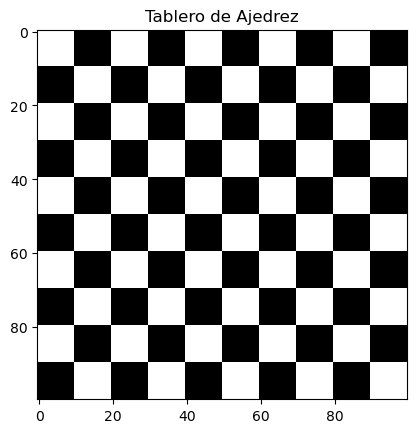

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

filas = 10
columnas = 10
alto_casilla = 10
ancho_casilla = 10
tablero = np.zeros((filas * alto_casilla, columnas * ancho_casilla, 3), dtype=np.uint8)

for fila in range(filas):
    for columna in range(columnas):
        if (fila + columna) % 2 == 0:
            tablero[fila * alto_casilla:(fila + 1) * alto_casilla,
                    columna * ancho_casilla:(columna + 1) * ancho_casilla] = [255, 255, 255]

plt.imshow(tablero)

plt.title('Tablero de Ajedrez')
plt.show()

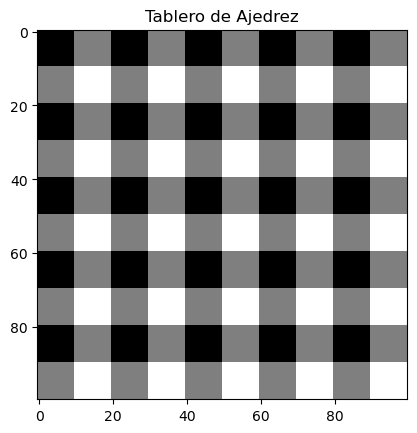

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
tamano_casilla = 10
tablero = np.zeros((100, 100), dtype=np.uint8)
for fila in range(10):
    for columna in range(10):
        if fila % 2 == 0:
            if columna % 2 == 0:
                cl = 0
            else:
                cl = 127
        else:
            if columna % 2 == 0:
                cl = 127
            else:
                cl = 255
        tablero[fila*tamano_casilla:(fila+1)*tamano_casilla, columna*tamano_casilla:(columna+1)*tamano_casilla] = cl
plt.imshow(tablero, cmap='gray')
plt.title('Tablero de Ajedrez')
plt.show()


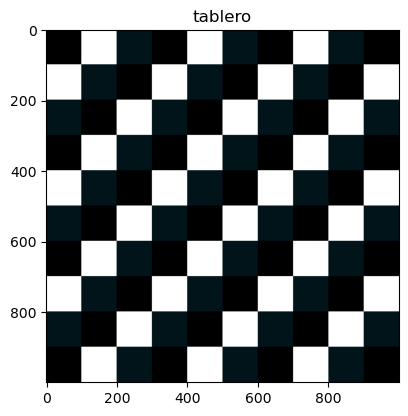

In [13]:
from PIL import Image


ancho = 1000 
alto = 1000  
tamaño_casilla = 100
tablero = Image.new('RGB', (ancho, alto), 'white')
pixels = tablero.load()
colores = [(0, 0, 0), (255, 255, 255), (0, 20, 25)]


for fila in range(0, alto, tamaño_casilla):
    for columna in range(0, ancho, tamaño_casilla):
        indice_color = (fila // tamaño_casilla + columna // tamaño_casilla) % len(colores)
        color = colores[indice_color]
        for y in range(tamaño_casilla):
            for x in range(tamaño_casilla):
                pixels[columna + x, fila + y] = color

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(tablero, cmap='gray')
plt.title('tablero')

plt.show()

Ejercicio 2. 
Tomando en cuenta la imagen2.jpg aplica un degradado lineal en ella.

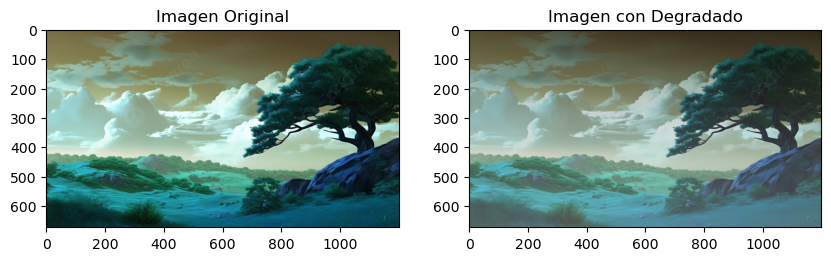

In [41]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

imagen = cv2.imread('imagen2.jpg')

# Dimensiones 
height, width, _ = imagen.shape

degradado = np.zeros((height, width), dtype=np.uint8)
for i in range(width):
    degradado[:, i] = np.linspace(0, 255, height, dtype=np.uint8)

# Aplicar el degradado a la imagen
imagen_con_degradado = cv2.addWeighted(imagen, 0.7, cv2.cvtColor(degradado, cv2.COLOR_GRAY2BGR), 0.3, 0)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(imagen, cmap='gray')
plt.title('Imagen Original')


plt.subplot(1, 2, 2)
plt.imshow(imagen_con_degradado, cmap='gray')
plt.title('Imagen con Degradado')


plt.show()


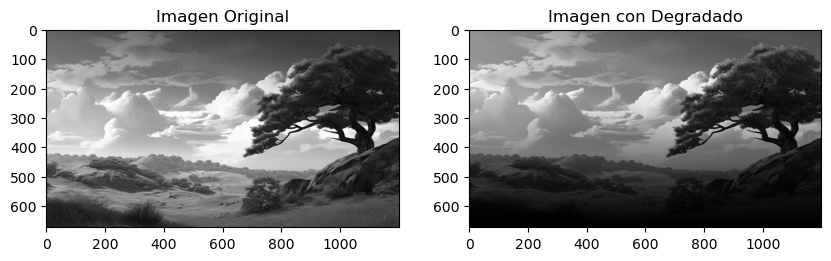

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

imagen = cv2.imread('imagen2.jpg')
img=cv2.cvtColor(imagen,cv2.COLOR_BGR2GRAY)

mask_deg = np.linspace(1, 0, img.shape[0])[:, np.newaxis]
mask_fin=np.tile(mask_deg,(1,img.shape[1]))
img_fin=(img.astype(np.float32)*mask_fin).astype(np.uint8)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Imagen Original')


plt.subplot(1, 2, 2)
plt.imshow(img_fin, cmap='gray')
plt.title('Imagen con Degradado')


plt.show()


Ejercicio 3. 
En la imagen1.jpg aplica una mascara triangular como se ve en la imagen.

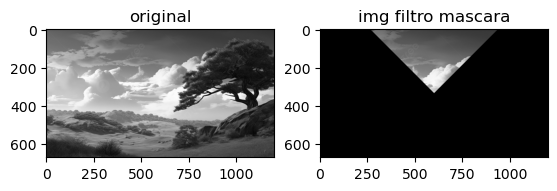

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('imagen2.jpg', cv2.IMREAD_GRAYSCALE)
alto, ancho = img.shape[:5]
mascara = np.zeros_like(img)
triangulo = np.array([[ancho//2, alto//2], [ancho//2 + 500, alto//2 - 500], [ancho//2 - 500, alto//2 - 500]])
cv2.fillPoly(mascara, [triangulo], 255)
img_fin = cv2.bitwise_and(img, img, mask=mascara)


plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.title('original')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))


plt.subplot(1, 3, 2)
plt.title('img filtro mascara')
plt.imshow(cv2.cvtColor(img_fin, cv2.COLOR_BGR2RGB))


plt.show()


Ejercicio 4. 
Tomando en cuenta la imagen2.jpg elige un punto de interés al azar, genera su histograma 
por canales, solariza y posteriza la imagen, realiza un tratamiento de umbralización(el de 
preferencia), guarda todas las imágenes resultantes con sus correspondientes nombres y 
muéstralas con jupyter. 

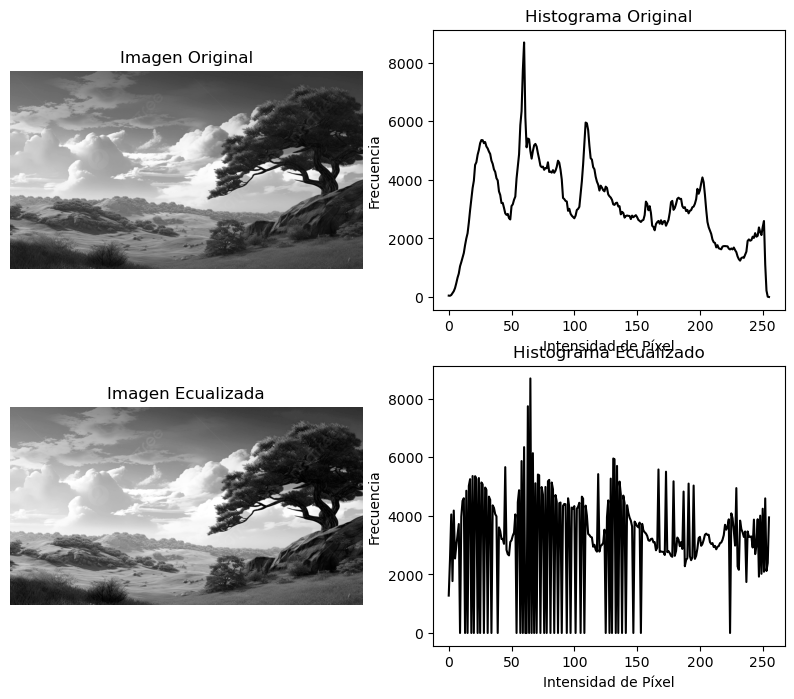

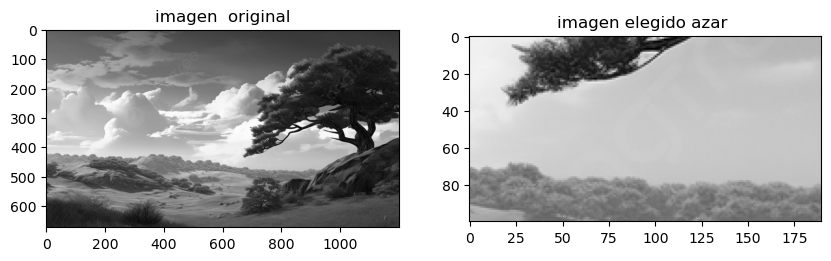

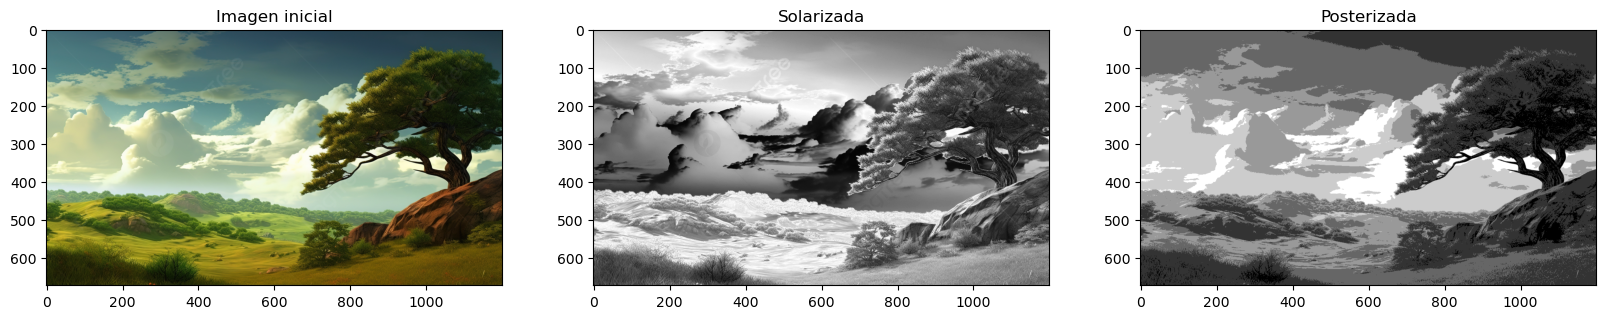

<Figure size 1000x500 with 0 Axes>

In [58]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=[10,5]
imagen_original = cv2.imread('imagen2.jpg', cv2.IMREAD_GRAYSCALE)

imagen=cv2.cvtColor(imagen_original,cv2.COLOR_BGR2RGB)

#  ecualización del histograma
imagen_ecualizada = cv2.equalizeHist(imagen_original)

#  histogramas de las imágenes originales y ecualizadas
hist_original = cv2.calcHist([imagen_original], [0], None, [256], [0, 256])
hist_ecualizada = cv2.calcHist([imagen_ecualizada], [0], None, [256], [0, 256])

# Mostrar imágenes y sus histogramas
plt.figure(figsize=(10, 8))

# Mostrar imagen original
plt.subplot(2, 2, 1)
plt.imshow(imagen_original, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')

# Mostrar histograma de la imagen original
plt.subplot(2, 2, 2)
plt.plot(hist_original, color='black')
plt.title('Histograma Original')
plt.xlabel('Intensidad de Píxel')
plt.ylabel('Frecuencia')

# Mostrar imagen ecualizada
plt.subplot(2, 2, 3)
plt.imshow(imagen_ecualizada, cmap='gray')
plt.title('Imagen Ecualizada')
plt.axis('off')

# Mostrar histograma de la imagen ecualizada
plt.subplot(2, 2, 4)
plt.plot(hist_ecualizada, color='black')
plt.title('Histograma Ecualizado')
plt.xlabel('Intensidad de Píxel')
plt.ylabel('Frecuencia')

plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.title('imagen  original')
plt.imshow(imagen)

plt.subplot(1, 2, 2)
plt.title('imagen elegido azar ')
plt.imshow(imagen[400:500,650:840,:])#identificar por x,y y color rgb


def solarizar(image, umbral):
    img_solarizar = np.where(image < umbral, image, 255 - image)
    return img_solarizar 

def posterizar(image, nivel):
    f_nvl = 255 / nivel
    img_poster = np.round(image / f_nvl) * f_nvl
    return img_poster.astype(np.uint8)

imagen = cv2.imread('imagen2.jpg')
img_gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)


umbral = 127
img_sol = solarizar(img_gris, umbral)


nivel = 5
img_posterizada = posterizar(img_gris, nivel)

plt.figure(figsize=(20, 10))

plt.subplot(131)
plt.title('Imagen inicial')
plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))


plt.subplot(132)
plt.title('Solarizada')
plt.imshow(img_sol, cmap='gray')


plt.subplot(133)
plt.title('Posterizada')
plt.imshow(img_posterizada, cmap='gray')


plt.show()

plt.tight_layout()
plt.show()


Teoría: 
¿A que nos referimos si hablamos de una imagen digital? 
visual compuesta por píxeles en una computadora o dispositivo

¿Qué es la profundidad del color ? 
Es la cantidad de informacion de color que se almacena en cada píxel de una imagen

¿Cuál es la diferencia entre CMKY y RGB?